<a href="https://colab.research.google.com/github/chetankhairnar05/Colab/blob/main/zomatoDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Zomato-data-.csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def handelRates(value):
  value = str(value).split('/')[0]
  return float(value)

df['rate'] = df['rate'].apply(handelRates)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [5]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4])

In [6]:
df['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [8]:
def handelOO(value):
  value = str(value)
  if value =='Yes':
    return 1
  else:
    return 0

df['online_order'] = df['online_order'].apply(handelOO)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,Yes,4.1,775,800,Buffet
1,Spice Elephant,1,No,4.1,787,800,Buffet
2,San Churro Cafe,1,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,No,3.7,88,300,Buffet
4,Grand Village,0,No,3.8,166,600,Buffet


In [9]:
df['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df['book_table'] = df['book_table'].apply(handelOO)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,1,1,4.1,775,800,Buffet
1,Spice Elephant,1,0,4.1,787,800,Buffet
2,San Churro Cafe,1,0,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,300,Buffet
4,Grand Village,0,0,3.8,166,600,Buffet


In [12]:
df['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [13]:
df.isnull().sum()


,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


Text(0.5, 0, 'Type of Restaurant')

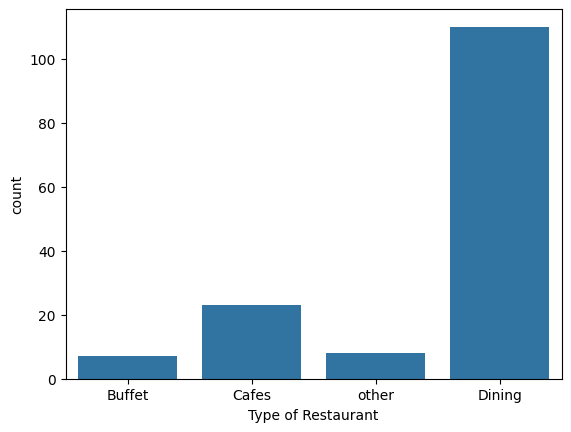

In [17]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')

In [18]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
result.head()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

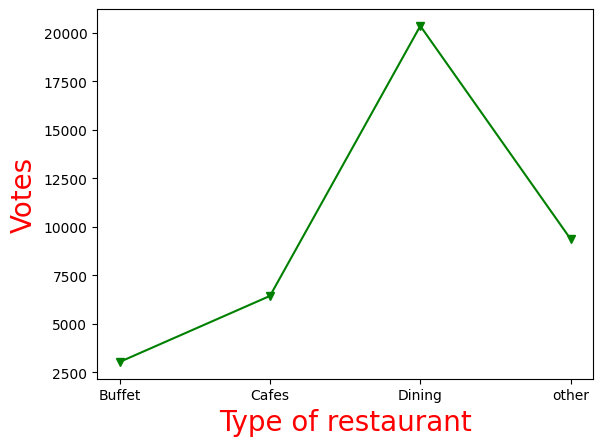

In [20]:
plt.plot(result, c='green', marker='v')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

In [23]:
m_v = df['votes'].max()
m_v_r = df.loc[df['votes']==m_v,['name','rate','votes']]
m_v_r.head() #name of restaurant with most votes

,name,rate,votes
38,Empire Restaurant,4.4,4884


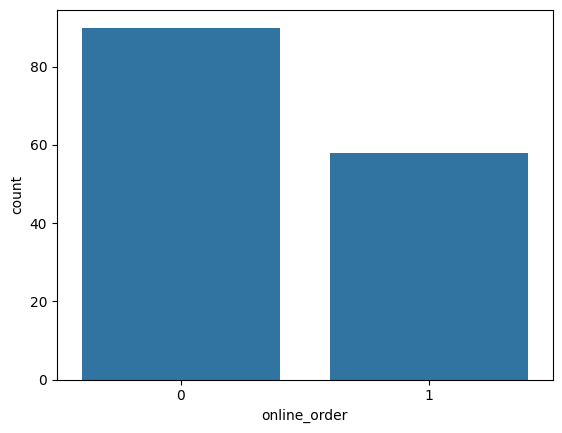

In [28]:
sns.countplot(x=df['online_order'])
plt.show()

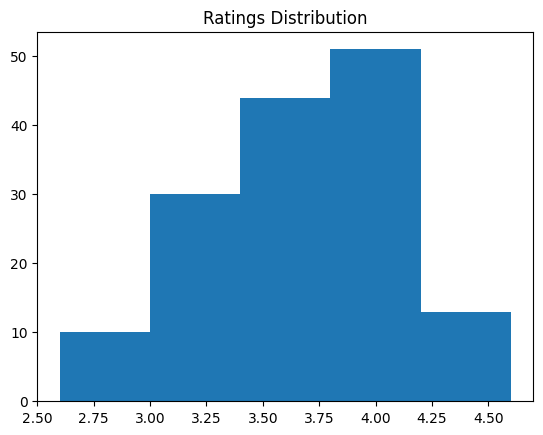

In [29]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

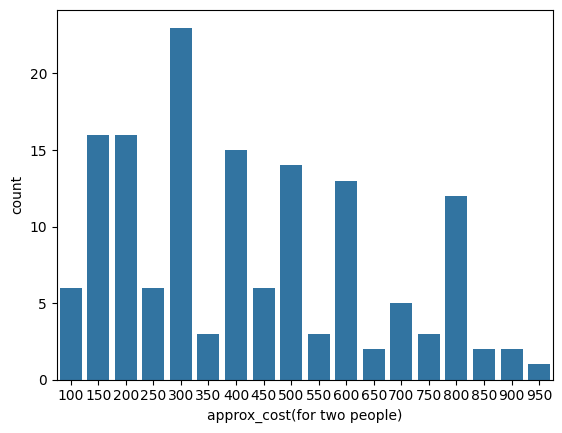

In [30]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

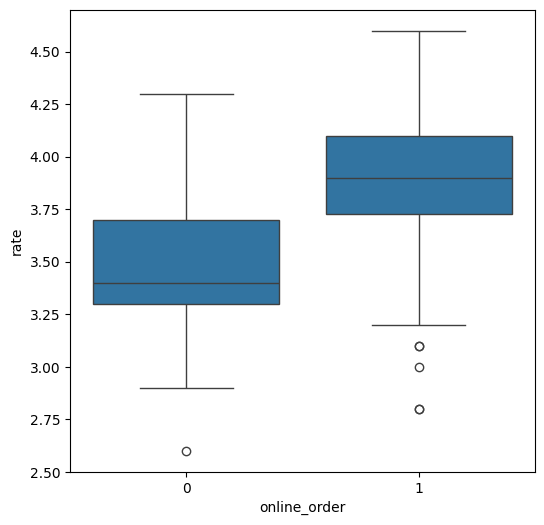

In [31]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

In [32]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
pivot_table.head()

online_order,0,1
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


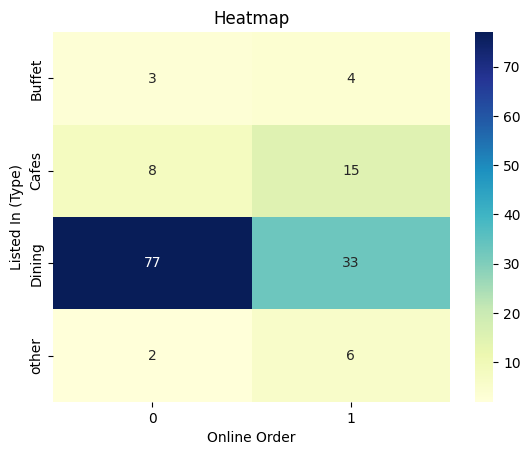

In [33]:
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()